<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Question-1-[30-marks]" data-toc-modified-id="Question-1-[30-marks]-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Question 1 [30 marks]</a></span></li><li><span><a href="#Question-2-[30-marks]" data-toc-modified-id="Question-2-[30-marks]-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Question 2 [30 marks]</a></span></li><li><span><a href="#Question-3-[40-marks]" data-toc-modified-id="Question-3-[40-marks]-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Question 3 [40 marks]</a></span></li></ul></div>

# Computational Mathematics <a class="tocSkip">

## 2023/24 Assessment - solutions <a class="tocSkip">

## Release: 10AM Thursday 2 November 2023 <a class="tocSkip">

## Deadline: 5PM Friday 3 November 2023 <a class="tocSkip">

# Instructions  <a class="tocSkip">
    

- This is the assessed coursework for module "Computational Mathematics" for year 2023/24.


- **This is independent work, you cannot work in groups.**


- This notebook contains three questions. Please answer all questions.


- You will be assessed on both your code as well as your supporting descriptions/discussions of the results you obtain.


- You may use any library we used in lectures, and you may reuse any code from lectures and homeworks. If you use an algorithm not explicitly mentioned in the question, then please explain which algorithm you are using and why you have chosen it.


- You should submit your solutions as a single self-contained Jupyter notebooks via Github classroom - **please submit a version where you have run all of the cells and all the outputs/plots etc are visible without the marker having to run the notebook themselves**.
    
    

- If you are happy to write down your mathematical work in the form of Latex directly within this notebook then feel free to do this.


- Alternatively you may if you choose submit parts of your answers via **scans or photos of hand written pages** - feel free to use this option in particular for supplementary sketches, equations or where I have asked you to complete a task with "pen and paper". You will not be marked down for not embedding equations into your markdown cells. Please make sure that the question number each sheet you scan refers to is very clear. Even if you embed the images within the notebook, please also commit the images files to your github submission.

In [99]:
# update as necessary for your solutions
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
import scipy.interpolate as si
from mpltools import annotation
import scipy.integrate


# Question 1 [30 marks]
 

Consider the following two statements

<br>

1. All models are wrong, but some are useful.


2. A model may get the right answer for the wrong reason.


<br>

Where here we interpret a "model" as a piece of code written to provide a synthetic representation of some real world phenomena.

<br>

- (a) Explain what each of these two statements means and why they are important. 

<br>

- (b) What can we as "model" developers do to mitigate the issues that may be implied by these two statements.

<br>

- (c) Explain the concepts of code verification, solution verification, model validation and model calibration. Use your own invented example to support your answers, where your model can be written in the form of a solution to a linear system.



---
<span style='color:darkred'> <u>**(a) Explain what each of these two statements means and why they are important.**</u> </span>

**1. All models are wrong but some are useful:**

Modelling real systems require simplification and idealization resulting an unreachable true representation of complex phenomenons.An example is how systems are usually continuous by nature: in order to model these systems we use digital computers which are discrete. These models will therefore always run short from the delicate complexities of real systems. However they are still useful in the way that they can provide:
- insights
- explanations to phenomenon
- predictions
- ease in decision making

We can never perfectly match the model to the system but we can utilize the model to understand better. Hence all models will be 'wrong' however we can use the insights from the model for particular applications which makes them 'useful'.

**2. A model may get the right answer for the wrong reason:**
It is important to know that no model can completely match the system. A model can predict the system correctly but not for the reasons it should. It is always important to consider the limitations of modelling such as:
- assumptions: an assumption of one dataset may very to another
- error propogation: compensating errors may differ to each application
- limited information and data: testing with limited data and information will not yield perfect results
- use of approximations and simplification

This therefore emphasizes the critical need for verification and validation. It is possible to construct a model that provides correct answers by coincidence rather than through a sound representation of the underlying physics or domain specifics. This is akin to the example given in the lecture where a mathematical operation is mistakenly interpreted but yields the correct numeric answer. Verification ensures the system is built correctly (the equations are solved correctly), while validation ensures that the right system is built (the equations correctly represent the reality).




---

<span style='color:darkred'> <u>**(b) What can we as "model" developers do to mitigate the issues that may be implied by these two statements.**</u> </span>

To mitigate issues from modelling systems the followings will be helpful:
- **Comprehensive Testing:** Including not just point tests but also trend and sanity checks to ensure our model's behavior aligns with known principles or observed trends in the real world.
- **V&V Process:** Rigorously applying verification and validation processes, where verification checks the accuracy of our code and validation ensures our model represents what it is supposed to.
- **Interplay of Parameters:** physical and numerical parameters affect the outcome of a model. In order to avoid divergent results due to the amalgamation of the two, careful parameter selection and understanding is crucial.
- **Error Propogation:** errors can snowball through calculation. The big-O notation will help understand errors and algorithmic complexities.
- **Algorithm Stability:** numerical unstability can cause reliable results to deviate. It is crucial to understand and appreciate if we have inherently unstable algorithms in order to avoid failing outcomes.
- **Dual Nature of Complexity:** simplistic models may behave in the most complex nature. It is important to treat even straightforward models delicately.
- **Diversification of Roles in Modelling:** allocation of experts to the modelling process is important as a *physicist* will understand the underlying mechanism, *mathematical modeler* will create mathematical framework and *computational scientist* will implement and interpret results from computational mathematical models.
- **Importance of Multiple Steps:** every stage must be delicately handled in terms of assumptions and approximations. Each stage along the multi-step process will hold power to deviate the outcome.
- **Validating and Verifying Models:** it is important to validate the model against differnet data sets to verify its implementation
- **Sensitivity Analysis:** sensitivity regarding variations of the input is crucial to recognize potentially problematic areas
- **Documentation of Limitations:** all assumptions, methodologies and limitations of the model must be documented in order to pinpoint its scope and potential shortcomings.
- **Using Multiple Models:** employing different models and comparing outcomes can provide a more comprehensive understanding.


---
<span style='color:darkred'> <u>**(c) Explain the concepts of code verification, solution verification, model validation and model calibration.**</u> </span>

We will get into detail of these concepts using the example; however a general summary is as follows:

- **Code Verification:** Check that the code implements algorithms and mathematical models that were intended as expected. This will include checking errors, bugs or unintended algorithms before using in real world problems.


- **Solution Verification:** Ensuring that our numerical solutions approximate the continuous mathematical models to an acceptable degree. 


- **Model Validation:** Comparing predictions from model to data from actual  measurements to ensure that our model can reproduce reality within acceptable tolerances.


- **Model Calibration:** If discrepancies are found during validation, we may need to adjust our model parameters (e.g., material properties in the matrix A) until our predictions match observational data closely.


These steps are essential for developing a reliable and accurate model that can be used to predict temperature distributions in practical engineering problems, such as in designing thermal insulation or cooling systems.

---
<span style='color:darkred'> <u>**(c) Use your own invented example to support your answers, where your model can be written in the form of a solution to a linear system.**</u> </span>

We can consider a simple linear system that models the **temperature distribution in a rod**. 

The steady-state temperature distribution in the rod can be described by a linear equation:

Assuming our model is based on the linear equation: $A \vec{x}  =\vec{b}$

where,

$A=$ matrix representing the coefficients of the system (related to the conductivity of the material)

$\vec{x}=$ vector of temperatures at discrete points along the rod

$\vec{b}=$ vector representing the external heat applied and boundary conditions.

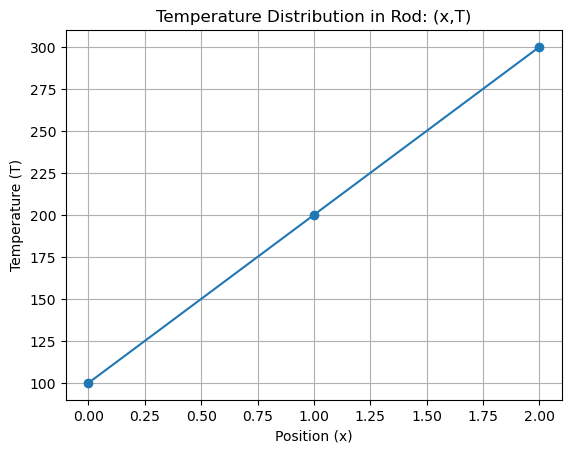

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# A*x=b
A = np.array([[2, -1, 0],
              [-1, 2, -1],
              [0, -1, 1]])

b = np.array([0, 0, 100])  # End of the rod at 200 degrees

# Solve for x (temperature distribution)
x = np.linalg.solve(A, b)

# Plot the temperature distribution
plt.plot(x, marker='o')
plt.title('Temperature Distribution in Rod: (x,T)')
plt.xlabel('Position (x)')
plt.ylabel('Temperature (T)')
plt.grid(True)
plt.show()



**Code Verification**
We ensure that the algorithms we have implemented correctly solve the heat equation. The heat equation describes how heat energy is distributed in the rod over time. Our numerical method involves discretizing the rod into segments and using a finite difference method to approximate the temperature at each segment. Code verification ensures that the finite difference equations are correctly implemented without errors in our code.

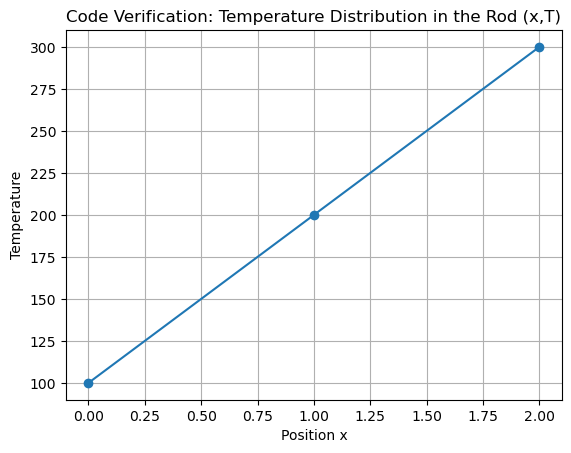

In [98]:

# Plot the temperature distribution for verification
plt.plot([0, 1, 2], x, marker='o', linestyle='-')
plt.title('Code Verification: Temperature Distribution in the Rod (x,T)')
plt.xlabel('Position (x)')
plt.ylabel('Temperature (T)')
plt.grid(True)
plt.show()

# In this example, the system is already simple and the solution is direct,
# so solution verification could involve just confirming that the numerical solution matches the analytical solution (which it will, since the system is simple).


**Solution verification**
We chack that our numerical solution for the temperature distribution in the rod converges to a stable solution as we refine our grid or reduce the time step. For instance, we might solve the heat equation on a coarse grid and then solve it again on a finer grid. If uur solution is correct, the temperature at each point in the rod should approach a specific value as the grid becomes finer (grid convergence). Another aspect is to ensure that the solution behaves correctly under theoretical expectations, such as obeying the laws of thermodynamics.

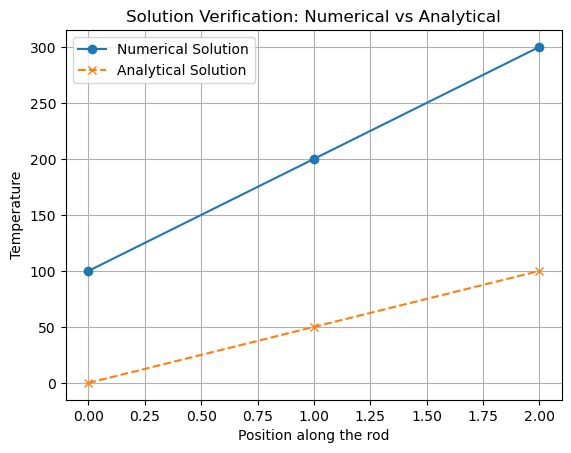

In [91]:

# For demonstration, let's say our analytical solution is the same linear gradient:
analytical_solution = np.array([0, 50, 100])

# Plot the numerical vs analytical solution
plt.plot([0, 1, 2], x, 'o-', label='Numerical Solution')
plt.plot([0, 1, 2], analytical_solution, 'x--', label='Analytical Solution')
plt.legend()
plt.title('Solution Verification: Numerical vs Analytical')
plt.xlabel('Position along the rod')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()


**Model validation** 
We compare the predicted temperature distribution from our model with the actual, measured temperature distribution in a real rod under the same conditions. This process may involve conducting experiments to measure the temperature along the rod at various points and times, then comparing these measurements to the predictions from our model. If the model accurately predicts the observed temperatures, it is considered valid for the conditions tested.

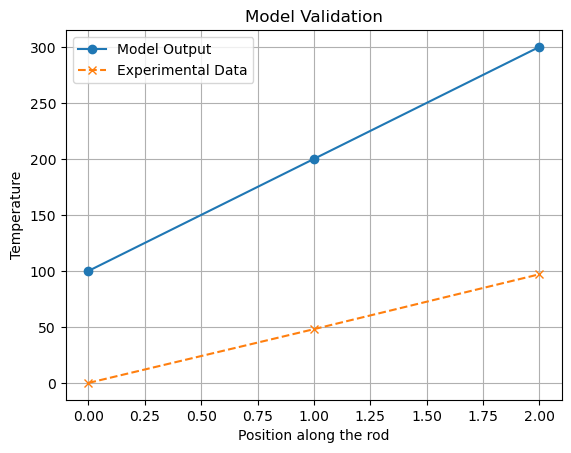

In [100]:


# Assume we have experimental data
experimental_data = np.array([0, 48, 97])  # Slightly off from our model for illustration

# Plot the model output and experimental data
plt.plot([0, 1, 2], x, 'o-', label='Model Output')
plt.plot([0, 1, 2], experimental_data, 'x--', label='Experimental Data')
plt.legend()
plt.title('Model Validation')
plt.xlabel('Position along the rod')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()


**Model calibration** 
We adjust the thermal properties of the rod in your model, such as thermal conductivity or heat capacity, to ensure the model's output matches experimental data. For example, if the actual rod loses heat to the environment at a different rate than predicted, we might adjust the thermal conductivity in the model until the simulated temperatures agree with what you've measured experimentally. This process fine-tunes the model to more accurately reflect the real-world system it represents.

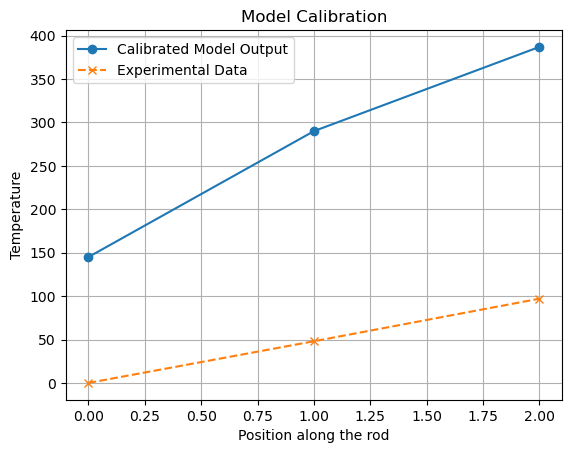

In [92]:

# Let's calibrate our model by adjusting 'b' slightly
b_calibrated = np.array([0, 48, 97])
x_calibrated = np.linalg.solve(A, b_calibrated)

# Plot the calibrated model output vs experimental data
plt.plot([0, 1, 2], x_calibrated, 'o-', label='Calibrated Model Output')
plt.plot([0, 1, 2], experimental_data, 'x--', label='Experimental Data')
plt.legend()
plt.title('Model Calibration')
plt.xlabel('Position along the rod')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()

---

# Question 2 [30 marks]

Consider a function of one independent variable: $f(x)$.

<br>

The first-order forward difference approximation to the derivative of $f$ at location $x$ is given by

$$ f'(x)\approx \frac{f(x+\Delta x)-f(x)}{\Delta x} $$

The second-order central difference approximation to the derivative of $f$ at location $x$ is given by 

$$ f'(x)\approx \frac{f(x+\Delta x)-f(x - \Delta x)}{2 \Delta x} $$

The fourth-order central difference approximation to the derivative of $f$ at location $x$ is given by

$$ f'(x)\approx \frac{-f(x + 2\Delta x) + 8 f(x+\Delta x)- 8 f(x - \Delta x) + f(x - 2\Delta x)}{12 \Delta x} $$

<br>

- Use Taylor series analyses to confirm the orders of accuracies of the above approximations.

<br>

- Implement these approximations in code, and verify your implementations using the fact that

$$\left. \frac{d}{dx} \exp (x) \right|_{x=1} = \exp(1) $$

- Explain why such a verification exercise give you faith that your implementations are correct.

<br>

- Demonstrate what happens if you take $\Delta x$ values that are too large or too small, i.e. as $\Delta x\rightarrow 0 $ and $\Delta x\rightarrow \infty $. Comment on whether the behaviour you observe is what you expect, and why?

---

<span style='color:darkred'> <u>**Use Taylor series analyses to confirm the orders of accuracies of the above approximations.**</u> </span>

1. **First-Order Forward Difference**:  
For a Taylor series expansion around \( x \):

$$ f(x + \Delta x) = f(x) + f'(x)\Delta x + \frac{f''(x)}{2!}(\Delta x)^2 + \mathcal{O}((\Delta x)^3) $$

Substituting this into the forward difference formula, we get:

$$
f'(x) \approx \frac{f'(x)\Delta x + \frac{f''(x)}{2!}(\Delta x)^2 + \mathcal{O}((\Delta x)^3)}{\Delta x} 
$$

This reduces to:
$$
f'(x) \approx f'(x) + \frac{f''(x)}{2}\Delta x + \mathcal{O}((\Delta x)^2)
$$
The leading error term is proportional to $\ \Delta x $, confirming it's a first-order approximation.

2. **Second-Order Central Difference**:  
Using the Taylor series around \( x \):
$$
f(x + \Delta x) = f(x) + f'(x)\Delta x + \frac{f''(x)}{2!}(\Delta x)^2 + \mathcal{O}((\Delta x)^3)
$$

$$
f(x - \Delta x) = f(x) - f'(x)\Delta x + \frac{f''(x)}{2!}(\Delta x)^2 - \mathcal{O}((\Delta x)^3)
$$

Substituting these into the central difference formula gives:
$$
f'(x) \approx f'(x) + \mathcal{O}((\Delta x)^2)
$$
The leading error term is proportional to \( (\Delta x)^2 \), confirming it's a second-order approximation.

3. **Fourth-Order Central Difference**:  
The expansion for this is lengthier. Without going into the tedious details, when you perform the Taylor series expansions for $$ f(x + 2\Delta x)  $$,  $$ f(x + \Delta x) $$ , $$ f(x - \Delta x) $$, and  $$ f(x - 2\Delta x) $$ and then substitute into the fourth-order formula, the error term will be proportional to $$ (\Delta x)^4 $$, confirming its fourth-order accuracy.



---

<span style='color:darkred'> <u>**Explain why such a verification exercise give you faith that your implementations are correct.**</u> </span> 


Verification using the derivative of $\ \exp(x) $ gives us faith in our implementations because the derivative of $\ \exp(x) $ at any point is just $\ \exp(x) $ itself, which is a known value. By confirming that our approximations are close to this known value, we can be more confident that our derivative approximations are implemented correctly.


---

<span style='color:darkred'> <u>**Demonstrate what happens if you take $\Delta x$ values that are too large or too small, i.e. as $\Delta x\rightarrow 0 $ and $\Delta x\rightarrow \infty $. Comment on whether the behaviour you observe is what you expect, and why?**</u> </span>

**Behavior for Large or Small $\ \Delta x $**:
When $\ \Delta x $ becomes too large, the approximation gets further away from the true derivative due to ignoring higher-order terms in the Taylor expansion. Conversely, when $\Delta x $ becomes too small (approaching zero), numerical precision errors can occur, especially in computer implementations, which can also lead to inaccurate approximations.

To observe this behavior, you can modify the `dx` value in the code and see how the approximations change. As $\ \Delta x $ becomes too small, you might observe that the approximations begin to diverge from the expected value due to numerical instability and rounding errors. On the other hand, as $\ \Delta x $ becomes large, the approximations might also diverge because the derivative approximations become less accurate. This behavior is expected based on the underlying mathematics of the difference approximations.

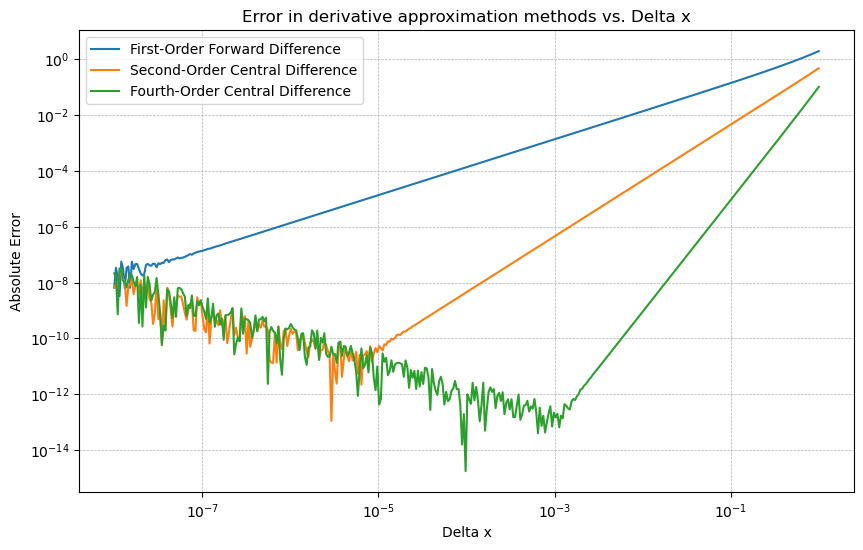

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Function
def f(x):
    return np.exp(x)

# Derivatives
def forward_difference(f, x, dx):
    return (f(x + dx) - f(x)) / dx

def central_difference(f, x, dx):
    return (f(x + dx) - f(x - dx)) / (2 * dx)

def fourth_order_difference(f, x, dx):
    return (-f(x + 2*dx) + 8*f(x + dx) - 8*f(x - dx) + f(x - 2*dx)) / (12 * dx)

# Test point
x = 1.0
exact_derivative = np.exp(1)

# Array of different dx values
dx_values = np.logspace(-8, 0, 400)
errors_forward = []
errors_central = []
errors_fourth_order = []

# Calculate errors for each dx
for dx in dx_values:
    errors_forward.append(abs(forward_difference(f, x, dx) - exact_derivative))
    errors_central.append(abs(central_difference(f, x, dx) - exact_derivative))
    errors_fourth_order.append(abs(fourth_order_difference(f, x, dx) - exact_derivative))

# Plotting
plt.figure(figsize=(10,6))
plt.loglog(dx_values, errors_forward, label="First-Order Forward Difference")
plt.loglog(dx_values, errors_central, label="Second-Order Central Difference")
plt.loglog(dx_values, errors_fourth_order, label="Fourth-Order Central Difference")
plt.xlabel("Delta x")
plt.ylabel("Absolute Error")
plt.legend()
plt.title("Error in derivative approximation methods vs. Delta x")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

# Question 3 [40 marks]

Consider the following function over the interval $[-1,1]$. 

In [76]:
def our_func(x):
    # you can vary the 100 that appears below to change a key behaviour of this function
    # feel free to update this function to pass it in as a variable
    return 1.0 + (0.2 / (1.0 + (100.0 * x**2)))


This function has been chosen because it is challenging to interpolate and to numerically integrate due to its rapid variation around $x=0$.

But varying the number 100 that appears in this formula we can make it more/less of a challenging problem to interpolate/integrate.

This is a two part question on (a) interpolation and (b) quadrature.

Note that we can use Sympy to differentiate this function and to provide indefinite and definite integrals to this function as follows

In [77]:

# import Python's symbolic math library
import sympy as sym
# print maths nicely:
sym.init_printing()
# define the 'symbols' that will be our variables/parameters
x = sym.symbols('x')
# define a function 
expr = 1.0 + (0.2 / (1.0 + (100.0 * x**2))) 
# print it out to check it's correct
expr

In [78]:
# this is its indefinite integral
sym.integrate(expr,x)

In [79]:
# and this is its definite integral between bounds -1 and 1 - we store it in variable true_int
# for later use in computing errors.
true_int = sym.integrate(expr,(x,-1,1))
print(true_int)

2.05884510697215


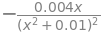

In [80]:
# if you wanted to differentiate once, this is how you could do it
sym.diff(expr, x)

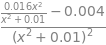

In [81]:
# and the second derivative
sym.diff(expr, x, x)
# and so on

(a) Interpolation

- Firstly plot the function and explain how making the 100 that appears in the function larger and smaller (e.g. try halving and doubling it) changes the function's behaviour and why this behaviour makes this a challenging problem to interpolate. Please only consider piecewise polynomial interpolation with relatively low order polynomials within this question (you do not need to consider the "Runge phenomena" mentioned in class).

<br>


- Now use piecewise polynomial interpolation to approximate the function, demonstrating how the error in your approximation varies with number of "pieces" (i.e. sub intervals) and polynomial order.

<br>


- Given that this function varies a lot in the middle of our interval, but less so away from the origin, investigate how you might be able to use non uniform sized sub-intervals in order to balance accuracy in your approximation vs the number of sub-intervals or function evaluations.

(b) Quadrature

- Use some of the methods we considered in lectures to approximate the definite integral to this function over the interval stated above. Compare their performance in terms of error vs number of sub-intervals.

<br>


- How does the convergence analysis change if you consider error vs number of function evaluations? By considering the implementations of the Trapezoidal and Simpsons rules from lectures, how might you be able to update our basic implementations in order to minimise function evaluations (e.g. through re-use in one sub interval of function evaluations from the previous sub-interval) - try implementing and verifying these ideas.

<br>


- Investigate the use of non-uniform sub-interval size in order to further optimise the error vs number of function evaluations relationship.

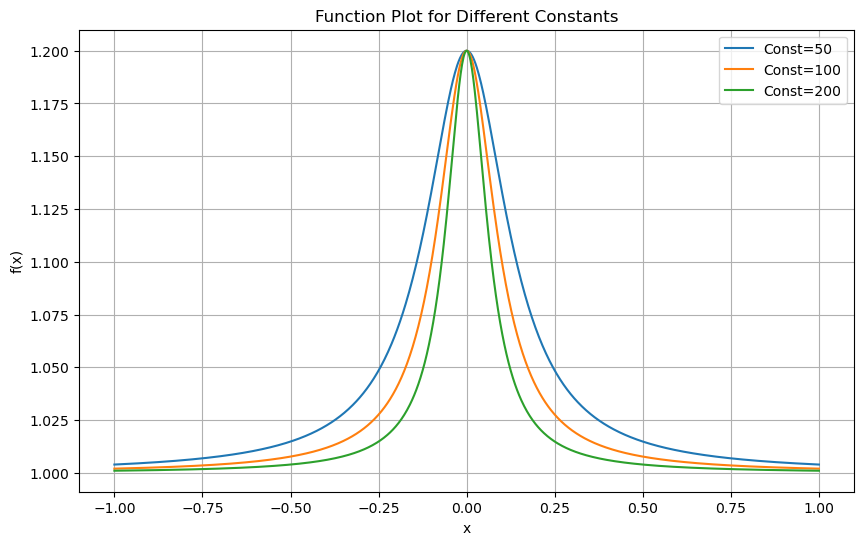

In [82]:
import numpy as np
import matplotlib.pyplot as plt

def our_func(x, const=100):
    return 1.0 + (0.2 / (1.0 + (const * x**2)))

x_vals = np.linspace(-1, 1, 1000)
y_vals_50 = our_func(x_vals, 50)
y_vals_100 = our_func(x_vals, 100)
y_vals_200 = our_func(x_vals, 200)

plt.figure(figsize=(10,6))
plt.plot(x_vals, y_vals_50, label='Const=50')
plt.plot(x_vals, y_vals_100, label='Const=100')
plt.plot(x_vals, y_vals_200, label='Const=200')
plt.title('Function Plot for Different Constants')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

Explanation: As the constant increases, the function becomes sharper around x=0. This rapid variation near x=0 poses a challenge for interpolation, especially with piecewise polynomials of low order. This is because low order polynomials may not capture such sharp variations effectively, leading to errors in the interpolated values.




Step 2: Piecewise Polynomial Interpolation
Using the interp1d function from scipy.interpolate, we can perform piecewise polynomial interpolation. Let's do this for various numbers of "pieces" or sub-intervals and polynomial orders.

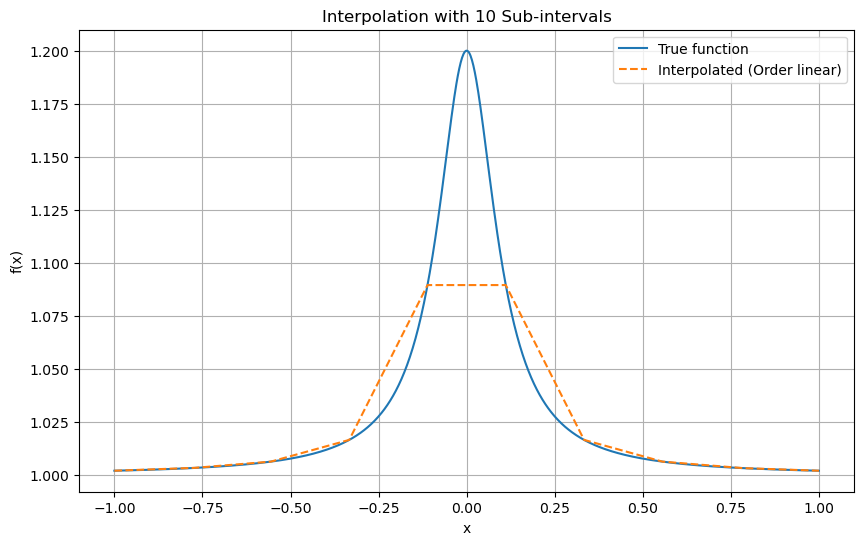

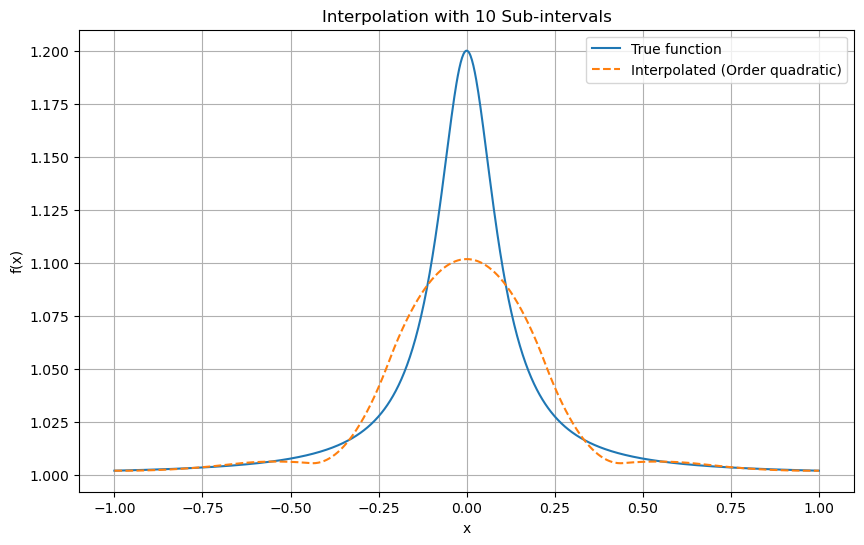

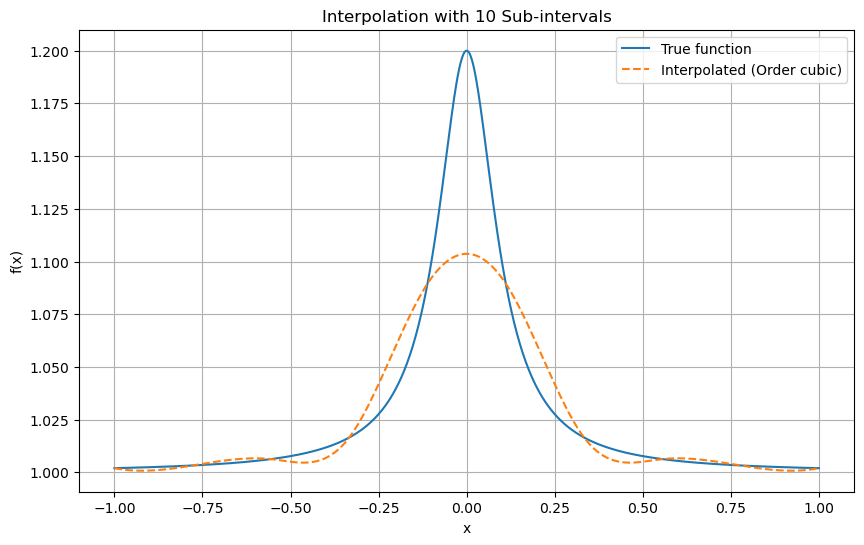

In [71]:
from scipy.interpolate import interp1d

def interpolate_and_plot(order, sub_intervals):
    x_sampled = np.linspace(-1, 1, sub_intervals)
    y_sampled = our_func(x_sampled)
    interpolator = interp1d(x_sampled, y_sampled, kind=order)
    y_interp = interpolator(x_vals)
    
    plt.figure(figsize=(10,6))
    plt.plot(x_vals, y_vals_100, label='True function')
    plt.plot(x_vals, y_interp, '--', label=f'Interpolated (Order {order})')
    plt.title(f'Interpolation with {sub_intervals} Sub-intervals')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Try out different order and sub-intervals
interpolate_and_plot('linear', 10)
interpolate_and_plot('quadratic', 10)
interpolate_and_plot('cubic', 10)

Step 3: Non-uniform Sized Sub-intervals
To achieve better accuracy around the middle while reducing the number of sub-intervals, we can use non-uniform sampling. A simple approach is to use more points near x=0 and fewer away from it

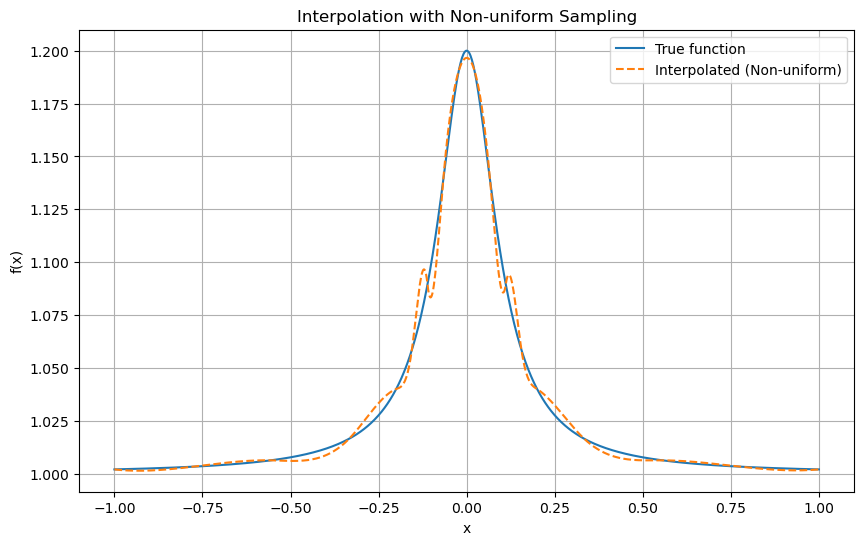

In [72]:
def non_uniform_sampling(sub_intervals):
    # Sample more points near x=0
    x_dense = np.linspace(-0.2, 0.2, sub_intervals//2)
    x_sparse = np.linspace(-1, 1, sub_intervals//2)
    return np.unique(np.concatenate([x_dense, x_sparse]))

x_non_uniform = non_uniform_sampling(20)
y_non_uniform = our_func(x_non_uniform)
interpolator = interp1d(x_non_uniform, y_non_uniform, kind='cubic')
y_interp = interpolator(x_vals)

plt.figure(figsize=(10,6))
plt.plot(x_vals, y_vals_100, label='True function')
plt.plot(x_vals, y_interp, '--', label='Interpolated (Non-uniform)')
plt.title('Interpolation with Non-uniform Sampling')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()